<a href="https://colab.research.google.com/github/Layana7592/Python/blob/main/Final_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/Student Depression Dataset for project.csv")
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0.0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1.0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,52980,Female,23.0,Surat,Student,4.0,0.0,7.25,3.0,0.0,Less than 5 hours,Healthy,PhD,Yes,11.0,2.0,No,1.0
10455,52983,Male,23.0,Bangalore,Student,1.0,0.0,5.44,2.0,0.0,More than 8 hours,Healthy,BA,No,10.0,2.0,No,0.0
10456,52986,Male,34.0,Hyderabad,Student,4.0,0.0,7.10,2.0,0.0,5-6 hours,Unhealthy,MD,Yes,12.0,3.0,No,1.0
10457,52988,Female,20.0,Hyderabad,Student,5.0,0.0,9.50,2.0,0.0,More than 8 hours,Healthy,Class 12,No,2.0,4.0,Yes,1.0


In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0.0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0.0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1.0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0.0


In [ ]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
10454,52980,Female,23.0,Surat,Student,4.0,0.0,7.25,3.0,0.0,Less than 5 hours,Healthy,PhD,Yes,11.0,2.0,No,1.0
10455,52983,Male,23.0,Bangalore,Student,1.0,0.0,5.44,2.0,0.0,More than 8 hours,Healthy,BA,No,10.0,2.0,No,0.0
10456,52986,Male,34.0,Hyderabad,Student,4.0,0.0,7.10,2.0,0.0,5-6 hours,Unhealthy,MD,Yes,12.0,3.0,No,1.0
10457,52988,Female,20.0,Hyderabad,Student,5.0,0.0,9.50,2.0,0.0,More than 8 hours,Healthy,Class 12,No,2.0,4.0,Yes,1.0
10458,52996,Female,21.0,Vadodara,Student,5.0,0.0,5.42,4.0,0.0,Mo,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info

<bound method DataFrame.info of           id  Gender   Age           City Profession  Academic Pressure  \
0          2    Male  33.0  Visakhapatnam    Student                5.0   
1          8  Female  24.0      Bangalore    Student                2.0   
2         26    Male  31.0       Srinagar    Student                3.0   
3         30  Female  28.0       Varanasi    Student                3.0   
4         32  Female  25.0         Jaipur    Student                4.0   
...      ...     ...   ...            ...        ...                ...   
10454  52980  Female  23.0          Surat    Student                4.0   
10455  52983    Male  23.0      Bangalore    Student                1.0   
10456  52986    Male  34.0      Hyderabad    Student                4.0   
10457  52988  Female  20.0      Hyderabad    Student                5.0   
10458  52996  Female  21.0       Vadodara    Student                5.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90                 5.0               0.0   
2                0.0  7.03                 5.0               0.0   
3                0.0  5.59                 2.0               0.0   
4                0.0  8.13                 3.0               0.0   
...              ...   ...                 ...               ...   
10454            0.0  7.25                 3.0               0.0   
10455            0.0  5.44                 2.0               0.0   
10456            0.0  7.10                 2.0               0.0   
10457            0.0  9.50                 2.0               0.0   
10458            0.0  5.42                 4.0               0.0   

          Sleep Duration Dietary Habits    Degree  \
0              5-6 hours        Healthy   B.Pharm   
1              5-6 hours       Moderate       BSc   
2      Less than 5 hours        Healthy        BA   
3              7-8 hours       Moderate       BCA   
4              5-6 hours       Moderate    M.Tech   
...                  ...            ...       ...   
10454  Less than 5 hours        Healthy       PhD   
10455  More than 8 hours        Healthy        BA   
10456          5-6 hours      Unhealthy        MD   
10457  More than 8 hours        Healthy  Class 12   
10458                 Mo            NaN       NaN   

      Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                       Yes               3.0   
1                                        No               3.0   
2                                        No               9.0   
3                                       Yes               4.0   
4                                       Yes               1.0   
...                                     ...               ...   
10454                                   Yes              11.0   
10455                                    No              10.0   
10456                                   Yes              12.0   
10457                                    No               2.0   
10458                                   NaN               NaN   

       Financial Stress Family History of Mental Illness  Depression  
0                   1.0                               No         1.0  
1                   2.0                              Yes         0.0  
2                   1.0                              Yes         0.0  
3                   5.0                              Yes         1.0  
4                   1.0                               No         0.0  
...                 ...                              ...         ...  
10454               2.0                               No         1.0  
10455               2.0                               No         0.0  
10456               3.0                               No         1.0  
10457               4.0                              Yes         1.0  
10458               NaN                            

In [ ]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
# Handle missing values
df['Financial Stress'].unique()
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mean())



In [ ]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.dtypes   #for encoding to find which column is object

,0
id,int64
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


In [ ]:
encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])

print("✅ Categorical Encoding Done!\n")

✅ Categorical Encoding Done!



In [ ]:
df.dtypes

,0
id,int64
Gender,int64
Age,float64
City,int64
Profession,int64
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


<ipython-input-12-399583b73ee0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Depression'], palette="coolwarm")


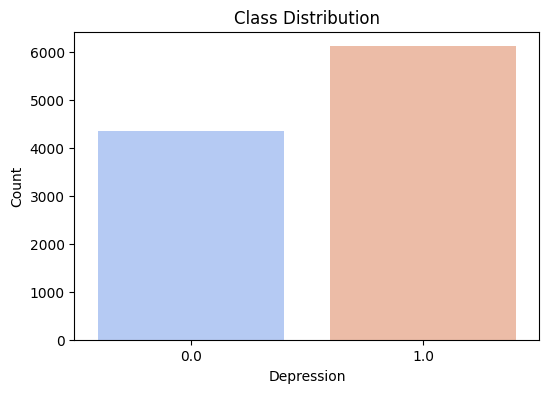

In [ ]:
#A countplot is used when you want to visualize the frequency (count) of categorical variables.
#It helps to see how many times each category appears in the dataset.

plt.figure(figsize=(6, 4))
sns.countplot(x=df['Depression'], palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Depression")
plt.ylabel("Count")
plt.show()

In [ ]:
#Analyzing the distribution of the 'Depression' column in a dataset

class_counts = df['Depression'].value_counts()
print(f"📊 Class Distribution:\n{class_counts}\n")
print(f"📉 Percentage:\n{(class_counts / len(df)) * 100}%\n")

📊 Class Distribution:
Depression
1.0    6115
0.0    4343
Name: count, dtype: int64

📉 Percentage:
Depression
1.0    58.466393
0.0    41.524046
Name: count, dtype: float64%



In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Depression']))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Depression'] = df['Depression']  # Add target back



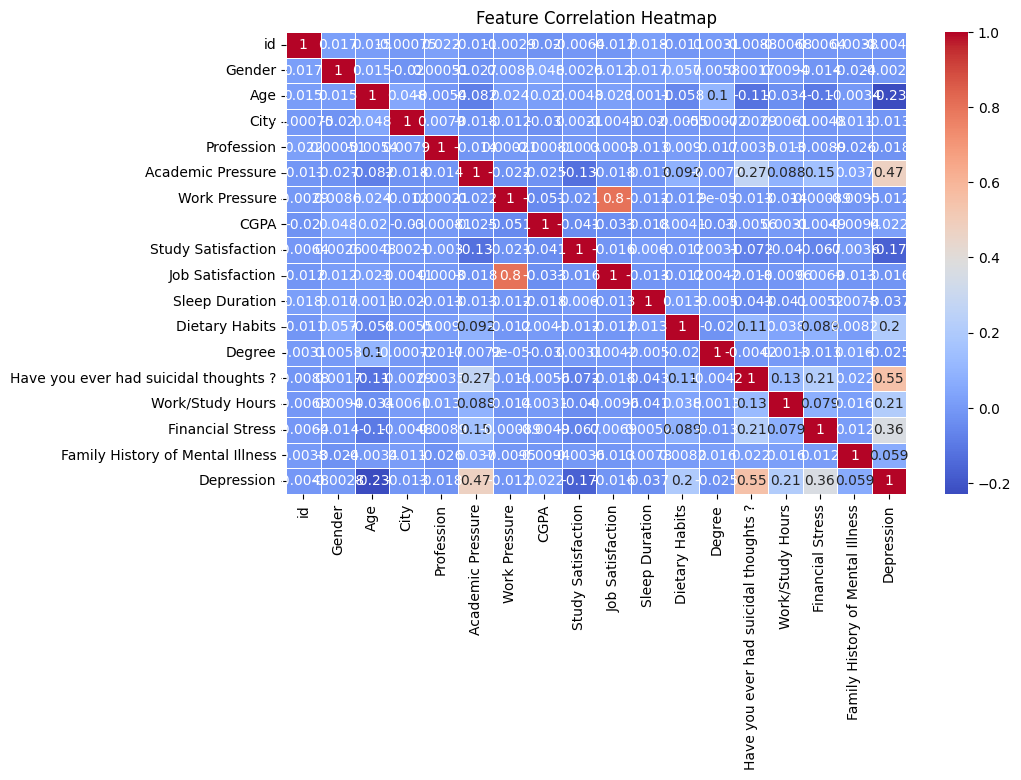

In [ ]:
#A heatmap is used to visualize relationships, patterns, and correlations between variables in a dataset.
#It is mainly used for exploratory data analysis (EDA) before training a machine learning model

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

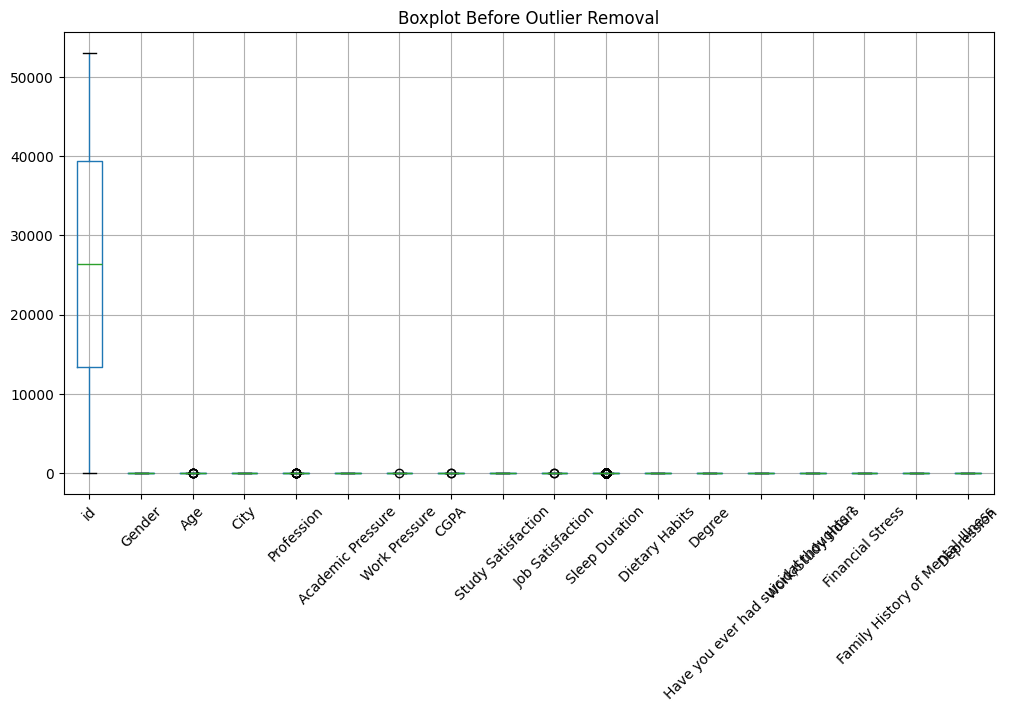

In [ ]:
#A boxplot (also called a box-and-whisker plot) is used in Exploratory Data Analysis (EDA)
# to visualize the distribution of numerical data and detect outliers.

plt.figure(figsize=(12, 6))
df.select_dtypes(include=['number']).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Before Outlier Removal")
plt.show()

In [ ]:
def remove_outliers_iqr(data):
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

df_cleaned = remove_outliers_iqr(df)
print(f"📌 Original dataset size: {df.shape}")
print(f"✅ Cleaned dataset size: {df_cleaned.shape}")

📌 Original dataset size: (10459, 18)
✅ Cleaned dataset size: (8166, 18)


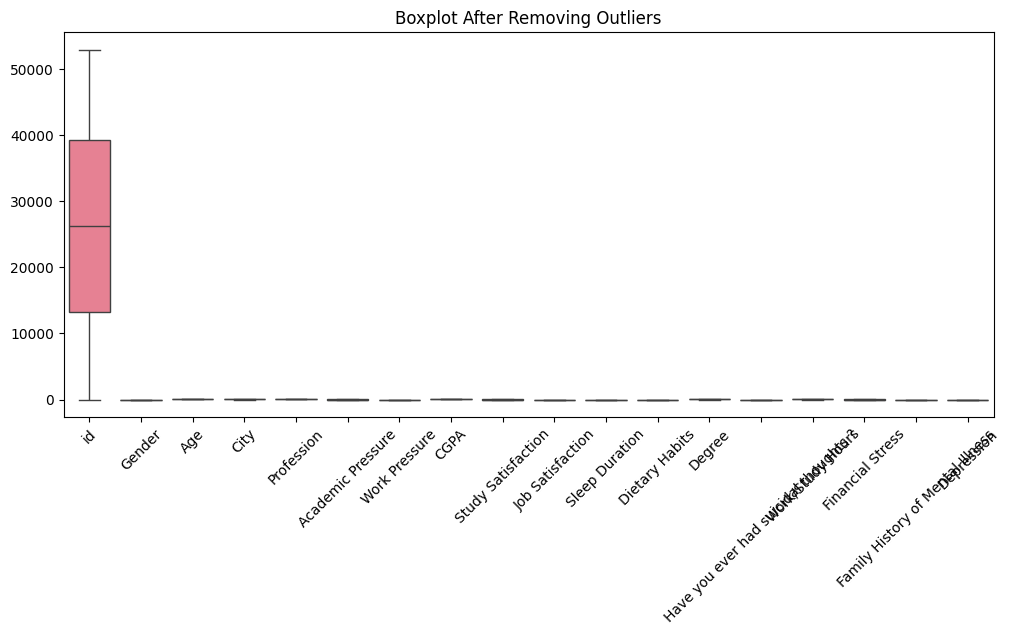

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_cleaned.select_dtypes(include=['number']))
plt.title("Boxplot After Removing Outliers")
plt.xticks(rotation=45)
plt.show()

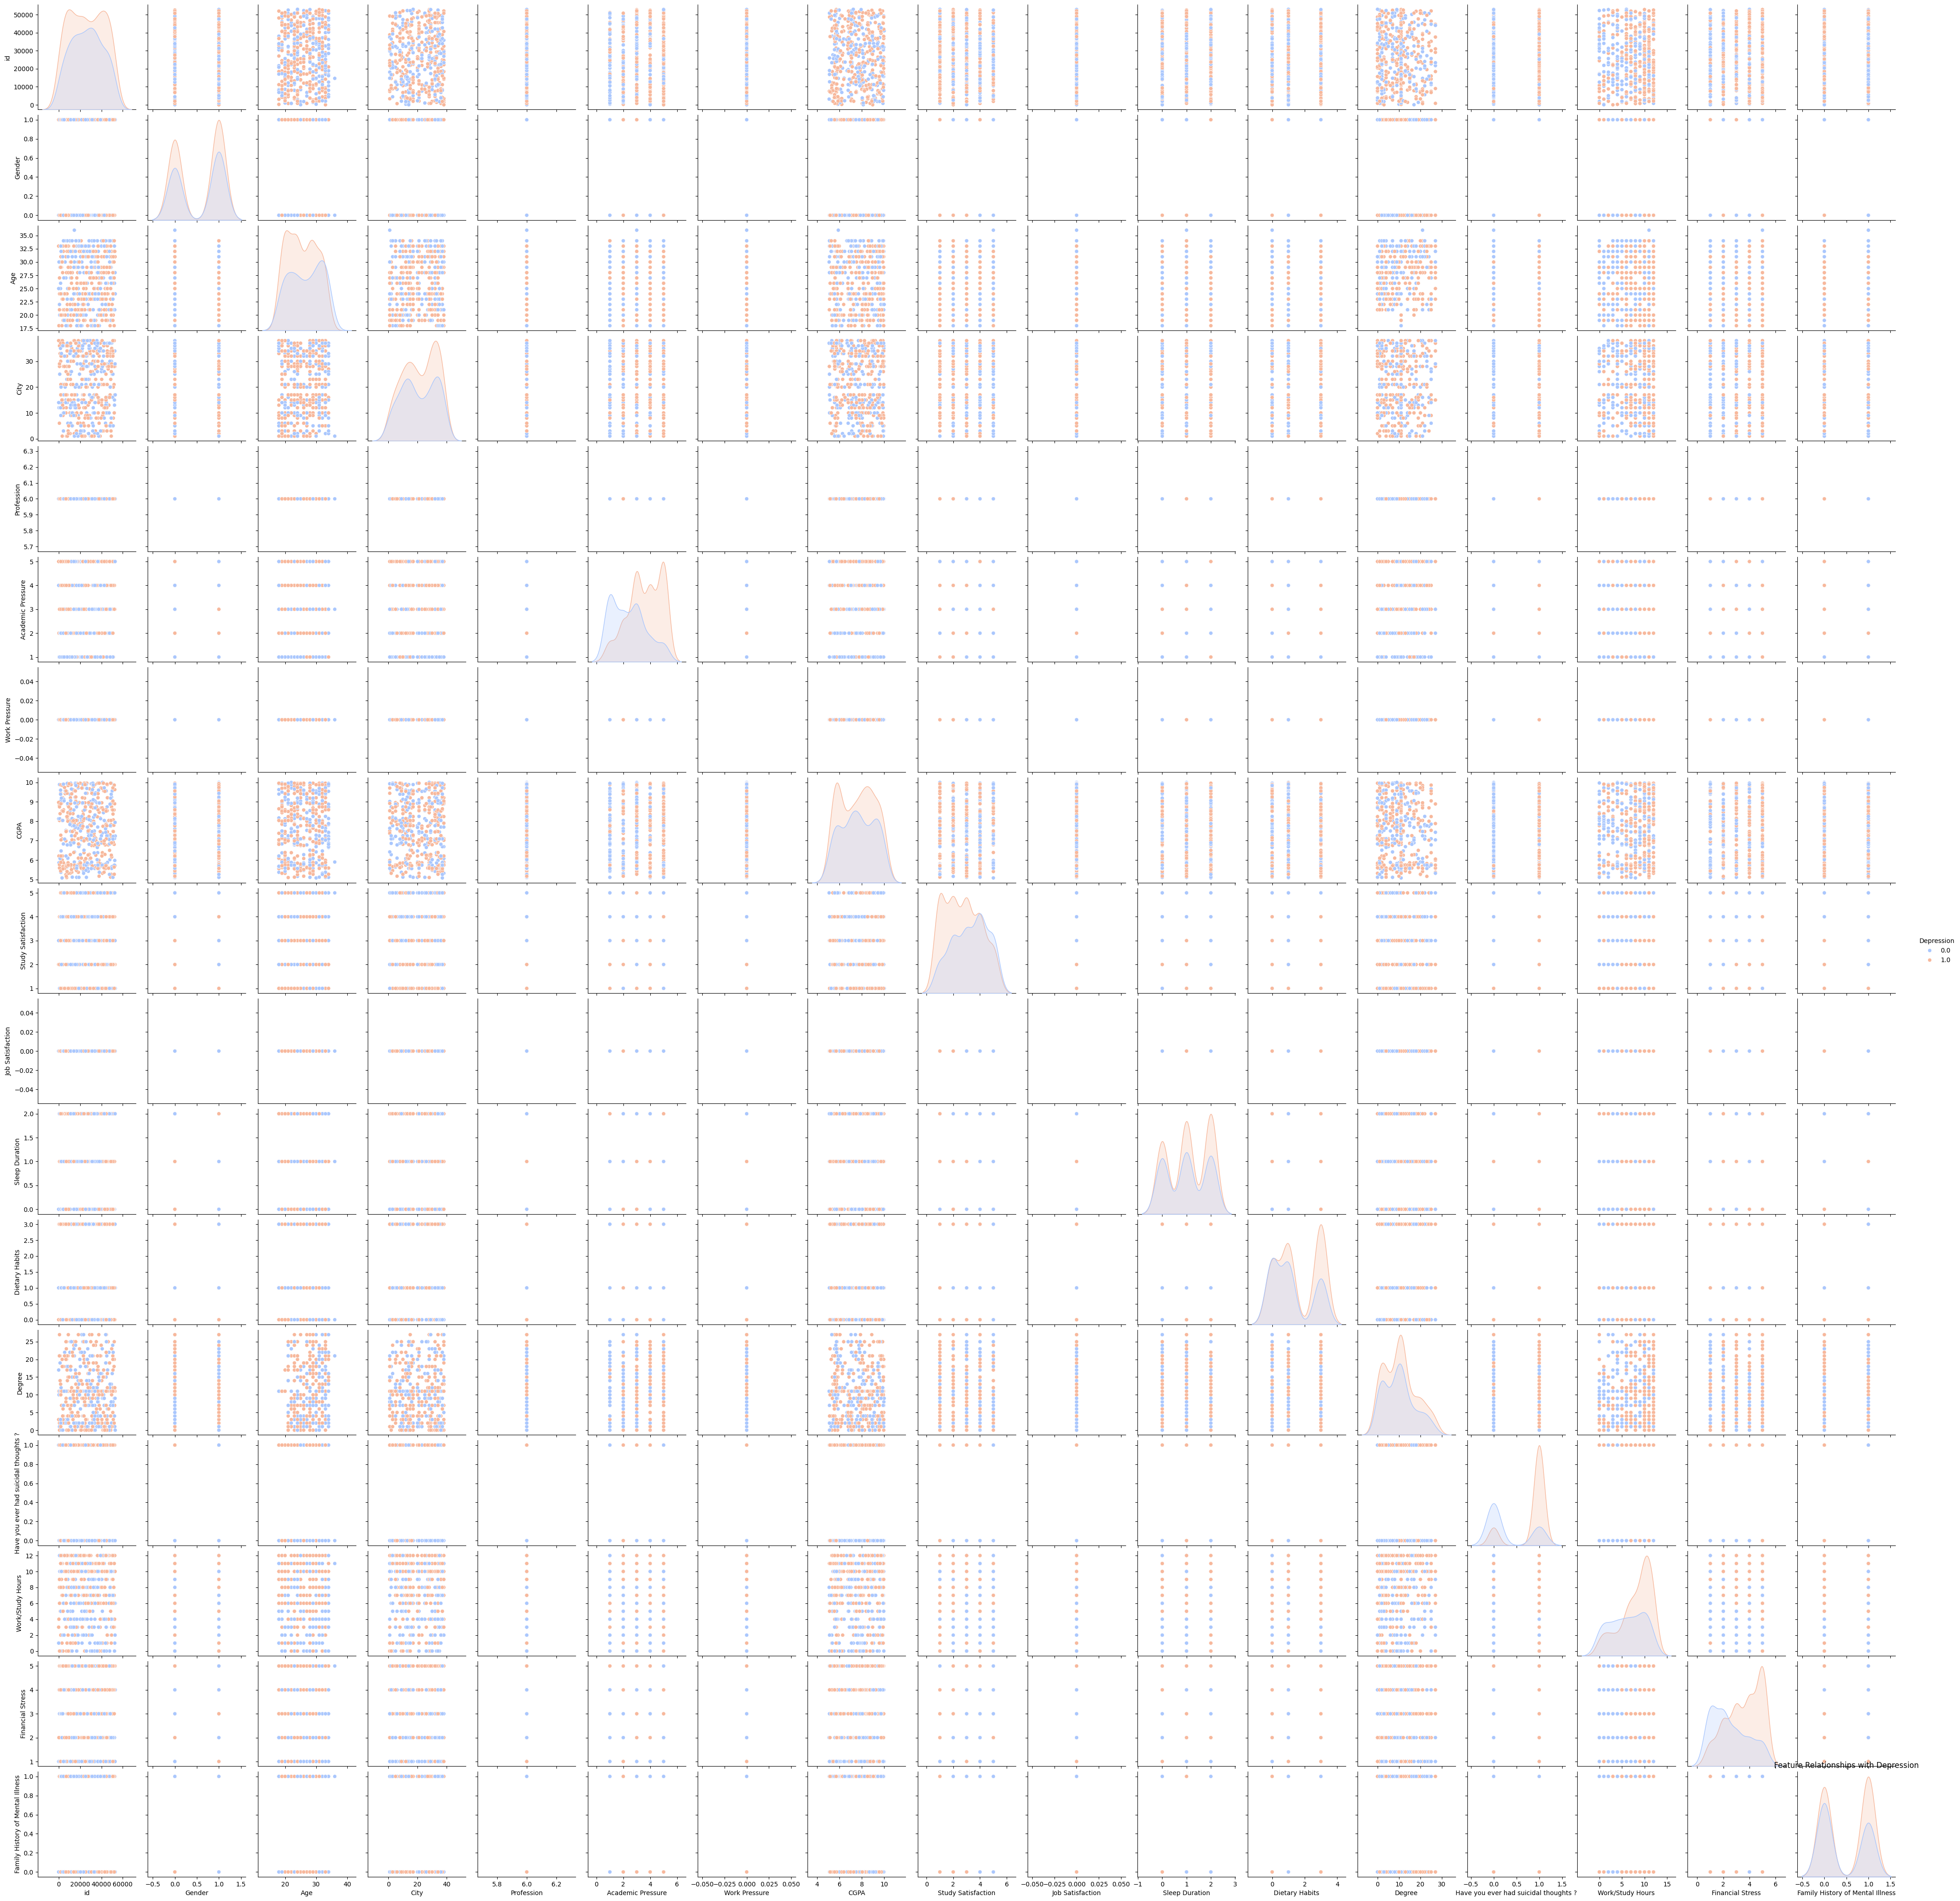

In [ ]:
#A pairplot (from Seaborn) is used in Exploratory Data Analysis (EDA)
# to visualize relationships between multiple numerical features in a dataset.
sns.pairplot(df_cleaned.sample(500), hue="Depression", palette="coolwarm")
plt.title("Feature Relationships with Depression")
plt.show()

In [ ]:
X = df_cleaned.drop(columns=['Depression'])
y = df_cleaned['Depression']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 Model Accuracy: {accuracy * 100:.2f}%\n")

🎯 Model Accuracy: 84.52%



In [ ]:
with open('depression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("✅ Model Saved as depression_model.pkl for Streamlit Deployment!\n")

✅ Model Saved as depression_model.pkl for Streamlit Deployment!

